## 1- import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from wordcloud import WordCloud
from collections import Counter
import plotly.graph_objects as go

import warnings

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 

from sklearn.metrics import accuracy_score , classification_report

warnings.filterwarnings('ignore')

## 2- Reading the dataset

In [2]:
data = pd.read_csv("/kaggle/input/email-spam-or-not-classification/spam_dataset.csv")

## 3- Data analysis 

In [3]:
data.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [4]:
data.tail()

,message_content,is_spam
995,"Hello Virginia,\n\nIt was great to catch up wi...",0
996,Final notice: Claim your inheritance from a di...,1
997,Hot singles in your area want to chat! Contact...,1
998,Your loan has been approved! Transfer funds to...,1
999,"Dear Brian,\n\nI wanted to let you know about ...",0


In [5]:
data.describe()

,is_spam
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
data.isnull().sum()

message_content    0
is_spam            0
dtype: int64

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996     True
997    False
998     True
999    False
Length: 1000, dtype: bool

In [9]:
data.columns

Index(['message_content', 'is_spam'], dtype='object')

In [10]:
data.shape

(1000, 2)

## 4- Data visualization

In [11]:
df = pd.DataFrame(data)

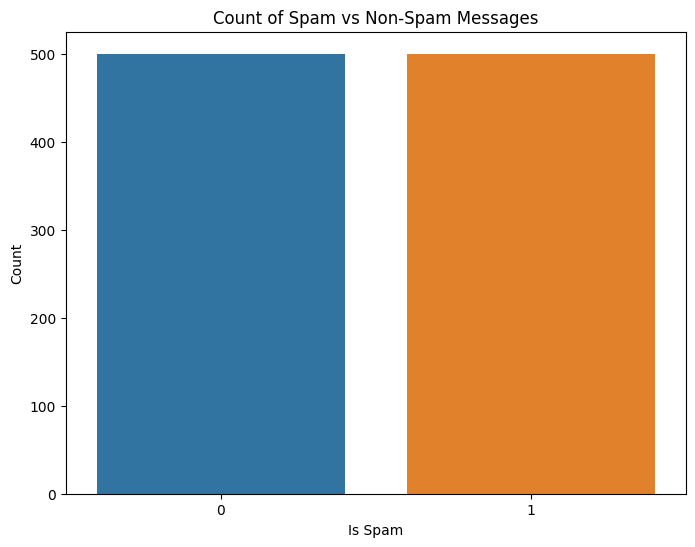

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='is_spam', data=df)
plt.title('Count of Spam vs Non-Spam Messages')
plt.xlabel('Is Spam')
plt.ylabel('Count')
plt.show()

In [13]:
fig = px.pie(df , names = 'is_spam' , title='Spam vs Non-Spam Messages' , labels={'is_spam':'Spam'},  color_discrete_sequence=['#636EFA', '#EF553B'])
fig.show()

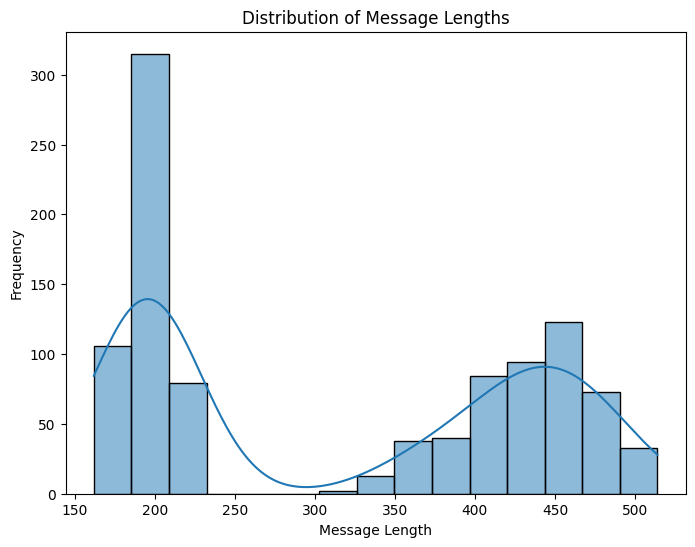

In [14]:
df['message_length'] = df['message_content'].apply(len)
plt.figure(figsize=(8,6))
sns.histplot(df['message_length'], kde = True , bins = 15)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

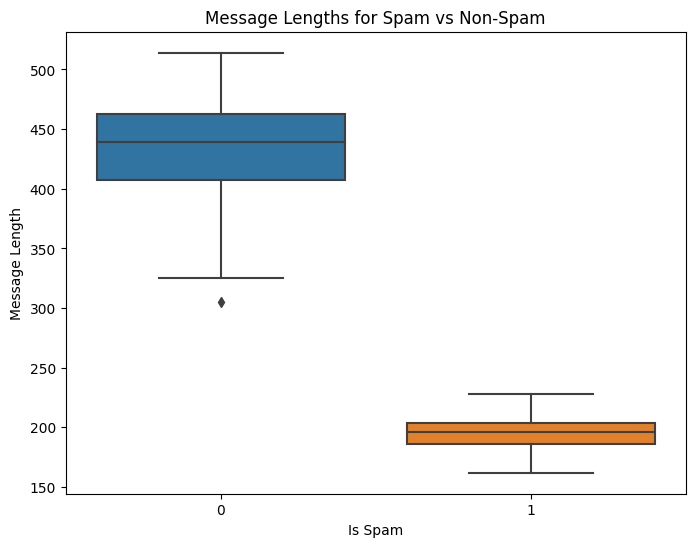

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_spam', y='message_length', data=df)
plt.title('Message Lengths for Spam vs Non-Spam')
plt.xlabel('Is Spam')
plt.ylabel('Message Length')
plt.show()

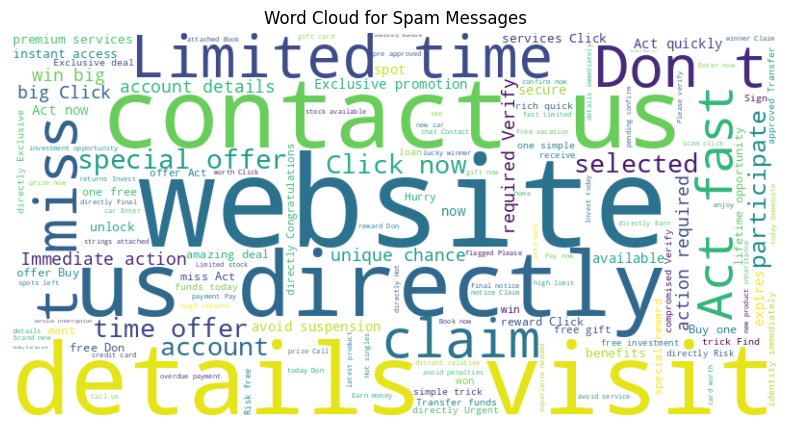

In [16]:
# Word cloud for spam messages
spam_words = ' '.join(df[df['is_spam'] == 1]['message_content'])

# Generate word cloud
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

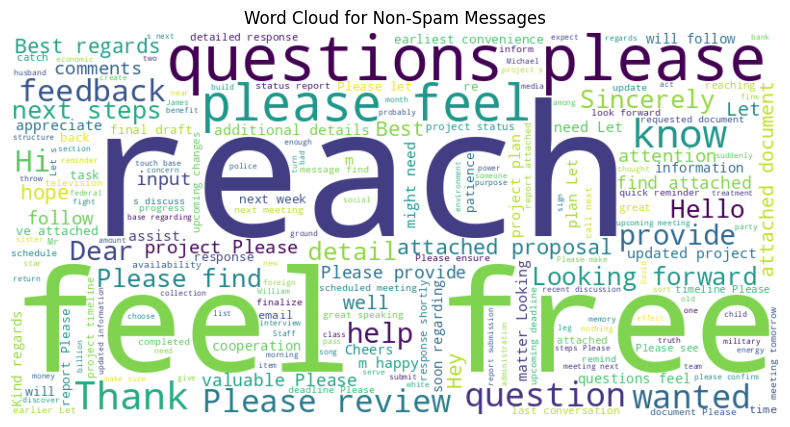

In [17]:
# Word cloud for non-spam messages
non_spam_words = ' '.join(df[df['is_spam'] == 0]['message_content'])

# Generate word cloud
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Messages')
plt.show()

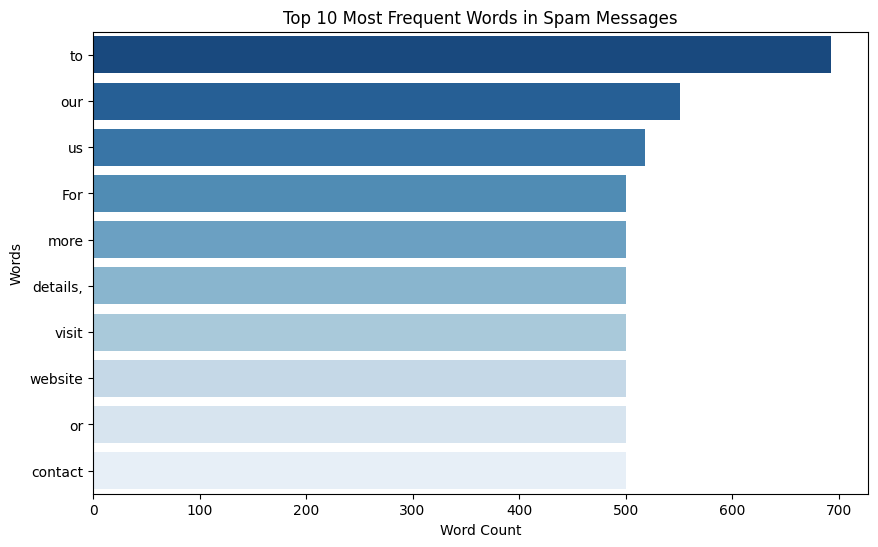

In [18]:
# Get the most common words in spam messages
spam_words_list = ' '.join(df[df['is_spam'] == 1]['message_content']).split()
spam_word_counts = Counter(spam_words_list).most_common(10)

# Create DataFrame of word counts
spam_words_df = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Bar plot of the most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=spam_words_df, palette='Blues_r')
plt.title('Top 10 Most Frequent Words in Spam Messages')
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.show()

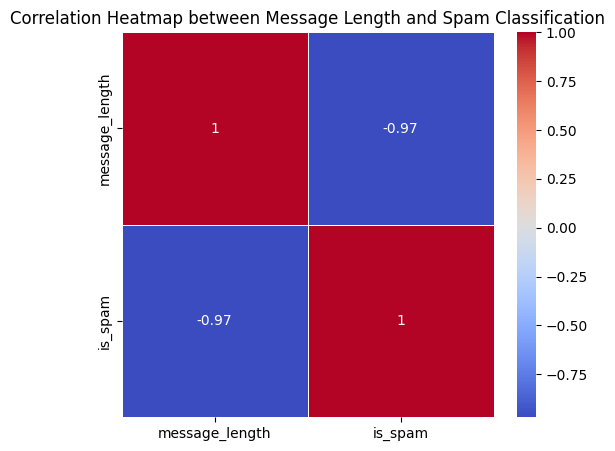

In [19]:
plt.figure(figsize=(6,5))
corr = df[['message_length', 'is_spam']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Message Length and Spam Classification')
plt.show()

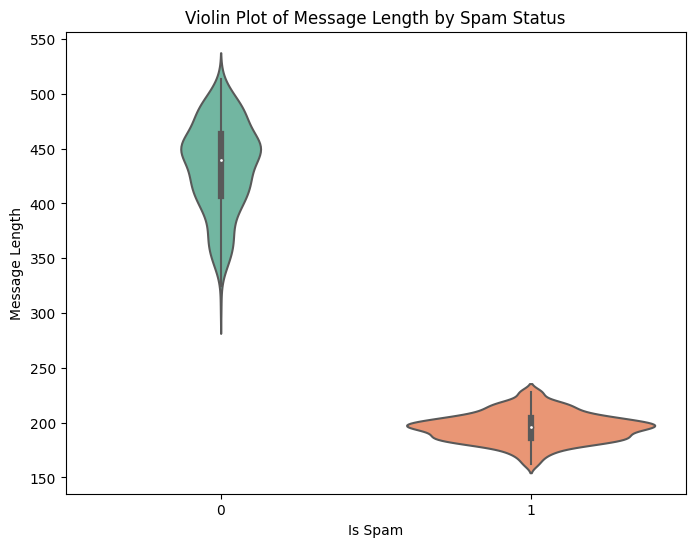

In [20]:
plt.figure(figsize=(8,6))
sns.violinplot(x='is_spam', y='message_length', data=df, palette='Set2')
plt.title('Violin Plot of Message Length by Spam Status')
plt.xlabel('Is Spam')
plt.ylabel('Message Length')
plt.show()

In [21]:
avg_length = df.groupby('is_spam')['message_length'].mean().reset_index()

# Bar chart of average message length using Plotly
fig = px.bar(avg_length, x='is_spam', y='message_length', 
             labels={'is_spam':'Spam', 'message_length':'Average Length'},
             title='Average Message Length for Spam vs Non-Spam',
             color='is_spam', color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

## 5- Data preprocessing

In [22]:
data.head(3)

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1


In [23]:
le = LabelEncoder()

In [24]:
data['message_content'] = le.fit_transform(data['message_content'])

In [25]:
data.head(3)

,message_content,is_spam
0,280,0
1,37,1
2,638,1


## 6- Spiliting the data

In [26]:
data.columns

Index(['message_content', 'is_spam'], dtype='object')

In [27]:
x = data[['message_content']]
y = data['is_spam']

## 7- Building the model 

In [28]:
# initialize the base learner 
base_learner = DecisionTreeClassifier(max_depth=1)

In [29]:
# initialize the adaboost classifier with 50 weak learners 
model = AdaBoostClassifier(base_estimator = base_learner , n_estimators=50 , learning_rate=1.0, random_state=42)

In [30]:
model.fit(x , y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [31]:
y_pred = model.predict(x)

In [32]:
y_pred[0:10]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [33]:
y[0:10]

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    1
Name: is_spam, dtype: int64

## 8- Evaluating the model

In [34]:
accuracy = accuracy_score(y,y_pred)
print(f"Accuracy is : {accuracy}")

Accuracy is : 1.0


In [35]:
class_report = classification_report(y,y_pred)
print(f"Classification Report Is : {class_report}")

Classification Report Is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

